# Decide the Next Pitch: A Pitch Prediction Model Using Attention-Based LSTM

The goal of this notebook is to re-implement the paper titled "Decide the Next Pitch: A Pitch Prediction Model Using Attention-Based LSTM" by Yu et al. 

## Data loading and sequencing

In [1]:
import os
import pandas as pd
import numpy as np

os.chdir('..')

In [2]:
import tensorflow as tf

tf.random.set_seed(42)

In [42]:
from utils import preprocessing
from utils.sequencer import Sequencer

data, repertoire_abb = preprocessing.preprocess_data(os.path.join('data', 'raw', 'wade_miley_15-21.csv'))
# Define valid pitch types
valid_pitch_dict = {
    'FF': 'Four-Seam Fastball', 'FT': 'Two-Seam Fastball',
    'CH': 'Change-up', 'CU': 'Curveball',
    'FC': 'Cutter', 'EP': 'Eephus',
    'FO': 'Forkball', 'KC': 'Knuckle Curve',
    'KN': 'Knuckleball', 'SC': 'Screwball',
    'SI': 'Sinker', 'SL': 'Slider',
    'FS': 'Splitter',
}
preprocessing.calculate_top_pitch(data, valid_pitch_dict)

data = pd.get_dummies(data, columns=['pitch_type'], dtype=int)
data = data.drop(columns=['zone'])

Wade Miley throws Four-Seam Fastball 27% of the time


In [ ]:
repertoire_size = len(repertoire_abb)
n_features = data.shape[1] - repertoire_size

seq = Sequencer(data=data,
                max_length=6,
                n_features=n_features,
                n_pitch_types=repertoire_size
                )
X_train, X_val, X_test, y_train, y_val, y_test = seq.make_sequences()

## LSTM Neural Network Implementation

For this first step in the full reimplementation, I selected the simplest neural network architecture used in the study, a single-layer LSTM with 256 units.

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.LSTM(256),
    tf.keras.layers.Dense(units=repertoire_size, activation='softmax'),
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='LSTM_256.keras',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max'
)

history = model.fit(X_train, y_train,
                    batch_size=64,
                    epochs=30,
                    validation_data=(X_val, y_val),
                    callbacks=[checkpoint_callback],
                    verbose=0
                    )

model = tf.keras.models.load_model('LSTM_256.keras')
print(f"Test Accuracy: {model.evaluate(X_test, y_test)[1]}")

235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2458 - loss: 5.5001
Test Accuracy: 0.22645530104637146


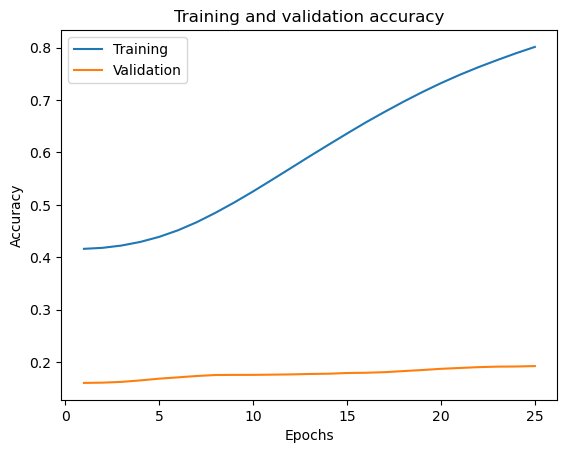

In [5]:
from utils.plot_utils import smooth_curve, plot_epochs

smooth_accuracy = smooth_curve(history.history['accuracy'][5:])
smooth_val_accuracy = smooth_curve(history.history['val_accuracy'][5:])

plot_epochs(x=range(1, len(smooth_accuracy) + 1),
            y={'Training': smooth_accuracy, 'Validation': smooth_val_accuracy},
            title='Training and validation accuracy',
            x_label='Epochs',
            y_label='Accuracy')

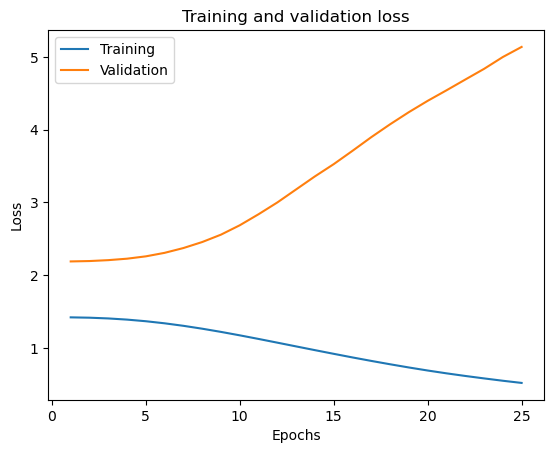

In [6]:
smooth_loss = smooth_curve(history.history['loss'][5:])
smooth_val_loss = smooth_curve(history.history['val_loss'][5:])

plot_epochs(x=range(1, len(smooth_loss) + 1),
            y={'Training': smooth_loss, 'Validation': smooth_val_loss},
            title='Training and validation loss',
            x_label='Epochs',
            y_label='Loss')

In [20]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.LSTM(256, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(units=repertoire_size, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='LSTM_256.keras',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max'
)

history = model.fit(X_train, y_train,
                    batch_size=64,
                    epochs=30,
                    validation_data=(X_val, y_val),
                    callbacks=[checkpoint_callback],
                    verbose=0
                    )

model = tf.keras.models.load_model('LSTM_256.keras')
print(f"Test Accuracy: {model.evaluate(X_test, y_test)[1]}")

235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3305 - loss: 1.9437
Test Accuracy: 0.3147728741168976


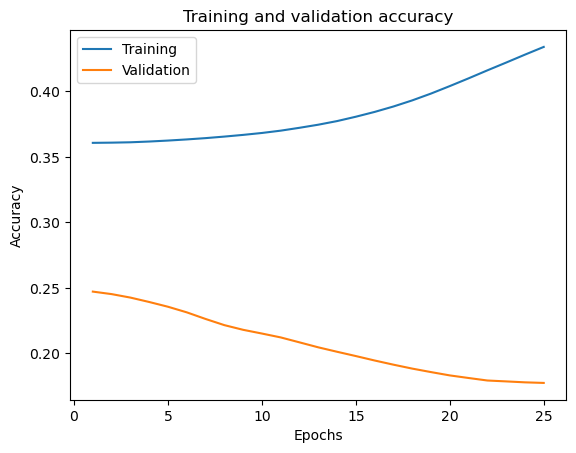

In [21]:
from utils.plot_utils import smooth_curve, plot_epochs

smooth_accuracy = smooth_curve(history.history['accuracy'][5:])
smooth_val_accuracy = smooth_curve(history.history['val_accuracy'][5:])

plot_epochs(x=range(1, len(smooth_accuracy) + 1),
            y={'Training': smooth_accuracy, 'Validation': smooth_val_accuracy},
            title='Training and validation accuracy',
            x_label='Epochs',
            y_label='Accuracy')

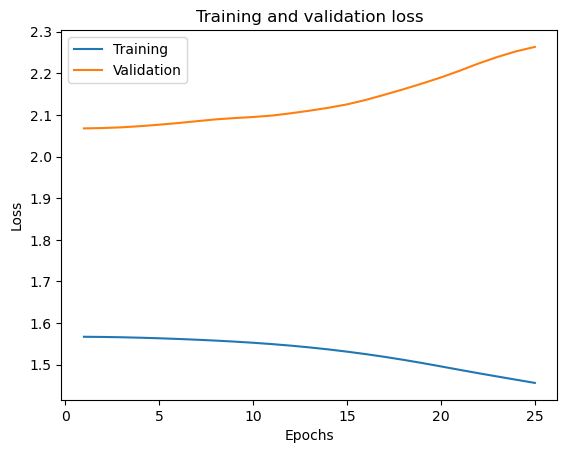

In [22]:
smooth_loss = smooth_curve(history.history['loss'][5:])
smooth_val_loss = smooth_curve(history.history['val_loss'][5:])

plot_epochs(x=range(1, len(smooth_loss) + 1),
            y={'Training': smooth_loss, 'Validation': smooth_val_loss},
            title='Training and validation loss',
            x_label='Epochs',
            y_label='Loss')

In [25]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.LSTM(256, kernel_regularizer=tf.keras.regularizers.l2(0.01), dropout=0.2, recurrent_dropout=0.2),
    tf.keras.layers.Dense(units=repertoire_size, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='LSTM_256.keras',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max'
)

history = model.fit(X_train, y_train,
                    batch_size=64,
                    epochs=30,
                    validation_data=(X_val, y_val),
                    callbacks=[checkpoint_callback],
                    verbose=0
                    )

model = tf.keras.models.load_model('LSTM_256.keras')
print(f"Test Accuracy: {model.evaluate(X_test, y_test)[1]}")

235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3432 - loss: 1.8294
Test Accuracy: 0.33235645294189453


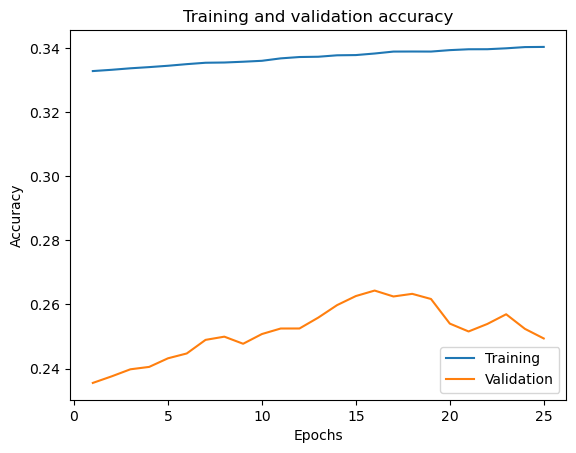

In [26]:
from utils.plot_utils import smooth_curve, plot_epochs

smooth_accuracy = smooth_curve(history.history['accuracy'][5:])
smooth_val_accuracy = smooth_curve(history.history['val_accuracy'][5:])

plot_epochs(x=range(1, len(smooth_accuracy) + 1),
            y={'Training': smooth_accuracy, 'Validation': smooth_val_accuracy},
            title='Training and validation accuracy',
            x_label='Epochs',
            y_label='Accuracy')

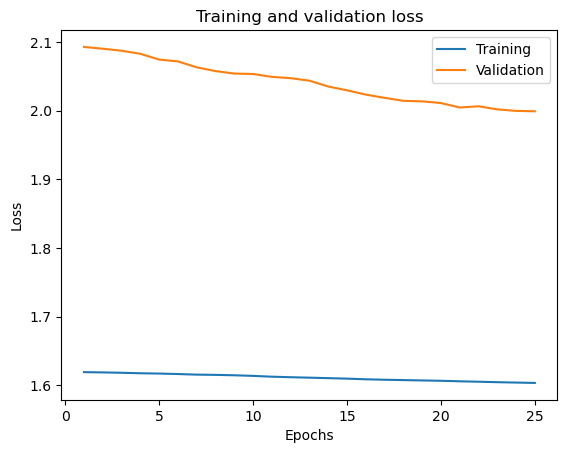

In [27]:
smooth_loss = smooth_curve(history.history['loss'][5:])
smooth_val_loss = smooth_curve(history.history['val_loss'][5:])

plot_epochs(x=range(1, len(smooth_loss) + 1),
            y={'Training': smooth_loss, 'Validation': smooth_val_loss},
            title='Training and validation loss',
            x_label='Epochs',
            y_label='Loss')

## Results

Using the model with the highest validation accuracy, I made predictions on the most recent 20% of Wade Miley’s pitches

Overall, the accuracy was quite low, at only 34%. Although this is a meaningful improvement from the baseline of 27%, it is still well below the accuracy observed in the study, which was over 60%.

In [28]:
# Print classification report
from sklearn.metrics import classification_report
y_test_argmax = np.argmax(y_test, axis=1)
preds_argmax = np.argmax(model.predict(X_test), axis=1)

print(classification_report(y_test_argmax, preds_argmax, zero_division=0))

235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.47      0.12      0.19      2181
           1       0.00      0.00      0.00       212
           2       0.47      0.48      0.47      3026
           3       0.20      0.43      0.28      1572
           4       0.10      0.11      0.10        92
           5       0.22      0.21      0.21       424

    accuracy                           0.33      7507
   macro avg       0.24      0.22      0.21      7507
weighted avg       0.38      0.33      0.32      7507



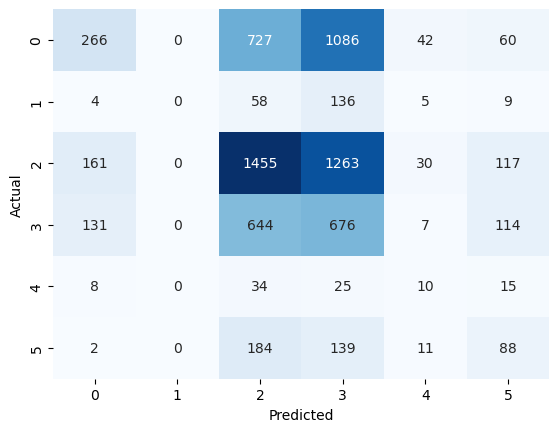

In [29]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix
cm = confusion_matrix(y_test_argmax, preds_argmax)

# Plot confusion matrix
plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## GRU Neural Network Implementation

For this first step in the full reimplementation, I selected the simplest neural network architecture used in the study, a single-layer LSTM with 256 units.

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.GRU(256),
    tf.keras.layers.Dense(units=repertoire_size, activation='softmax'),
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='GRU_256.keras',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max'
)

history = model.fit(X_train, y_train,
                    batch_size=64,
                    epochs=30,
                    validation_data=(X_val, y_val),
                    callbacks=[checkpoint_callback],
                    verbose=0
                    )

model = tf.keras.models.load_model('GRU_256.keras')

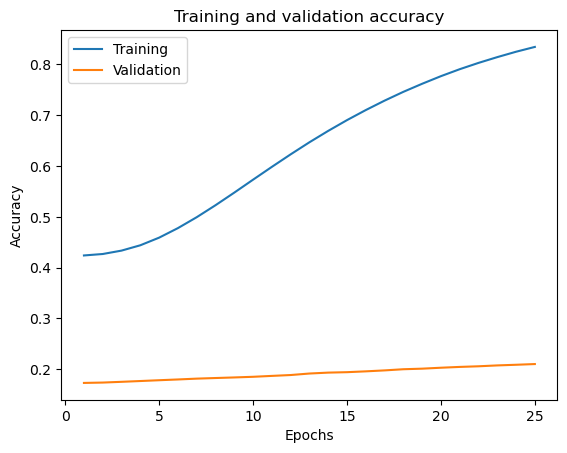

In [10]:
from utils.plot_utils import smooth_curve, plot_epochs

smooth_accuracy = smooth_curve(history.history['accuracy'][5:])
smooth_val_accuracy = smooth_curve(history.history['val_accuracy'][5:])

plot_epochs(x=range(1, len(smooth_accuracy) + 1),
            y={'Training': smooth_accuracy, 'Validation': smooth_val_accuracy},
            title='Training and validation accuracy',
            x_label='Epochs',
            y_label='Accuracy')

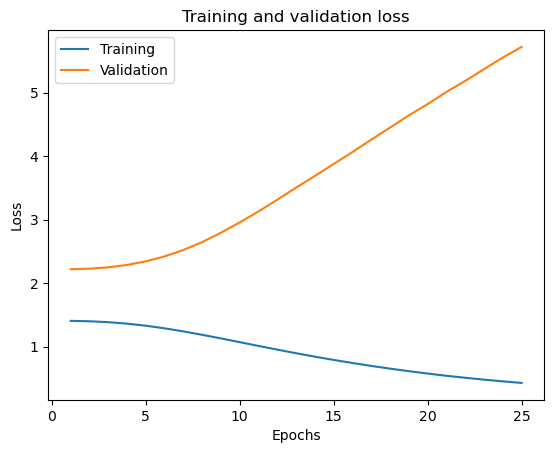

In [11]:
smooth_loss = smooth_curve(history.history['loss'][5:])
smooth_val_loss = smooth_curve(history.history['val_loss'][5:])

plot_epochs(x=range(1, len(smooth_loss) + 1),
            y={'Training': smooth_loss, 'Validation': smooth_val_loss},
            title='Training and validation loss',
            x_label='Epochs',
            y_label='Loss')

In [30]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.GRU(256, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(units=repertoire_size, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='GRU_256.keras',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max'
)

history = model.fit(X_train, y_train,
                    batch_size=64,
                    epochs=30,
                    validation_data=(X_val, y_val),
                    callbacks=[checkpoint_callback],
                    verbose=0
                    )

model = tf.keras.models.load_model('GRU_256.keras')
print(f"Test Accuracy: {model.evaluate(X_test, y_test)[1]}")

235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2799 - loss: 2.2649
Test Accuracy: 0.2700146436691284


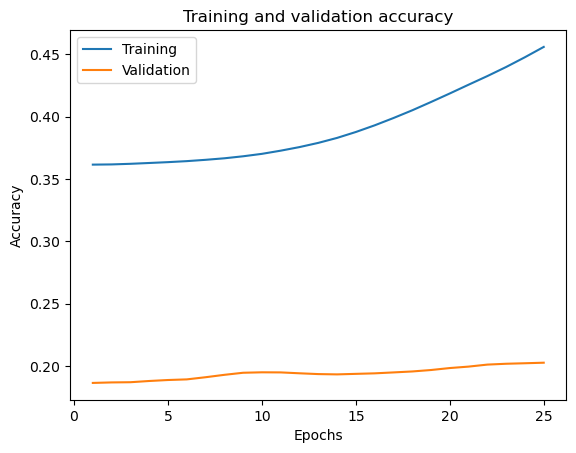

In [31]:
from utils.plot_utils import smooth_curve, plot_epochs

smooth_accuracy = smooth_curve(history.history['accuracy'][5:])
smooth_val_accuracy = smooth_curve(history.history['val_accuracy'][5:])

plot_epochs(x=range(1, len(smooth_accuracy) + 1),
            y={'Training': smooth_accuracy, 'Validation': smooth_val_accuracy},
            title='Training and validation accuracy',
            x_label='Epochs',
            y_label='Accuracy')

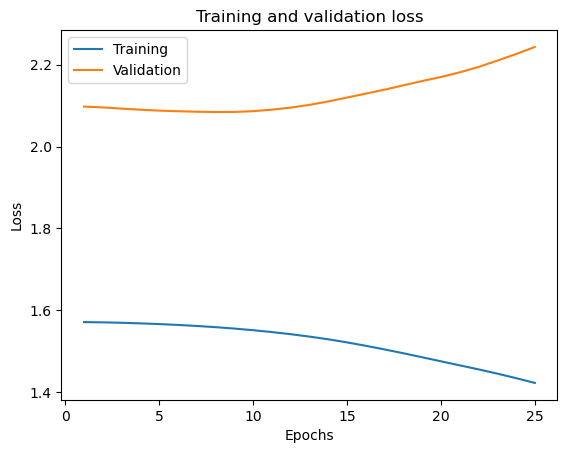

In [32]:
smooth_loss = smooth_curve(history.history['loss'][5:])
smooth_val_loss = smooth_curve(history.history['val_loss'][5:])

plot_epochs(x=range(1, len(smooth_loss) + 1),
            y={'Training': smooth_loss, 'Validation': smooth_val_loss},
            title='Training and validation loss',
            x_label='Epochs',
            y_label='Loss')

In [33]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.GRU(256, kernel_regularizer=tf.keras.regularizers.l2(0.01), dropout=0.2, recurrent_dropout=0.2),
    tf.keras.layers.Dense(units=repertoire_size, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='GRU_256.keras',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max'
)

history = model.fit(X_train, y_train,
                    batch_size=64,
                    epochs=30,
                    validation_data=(X_val, y_val),
                    callbacks=[checkpoint_callback],
                    verbose=0
                    )

model = tf.keras.models.load_model('GRU_256.keras')
print(f"Test Accuracy: {model.evaluate(X_test, y_test)[1]}")

235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3341 - loss: 1.8669
Test Accuracy: 0.3179698884487152


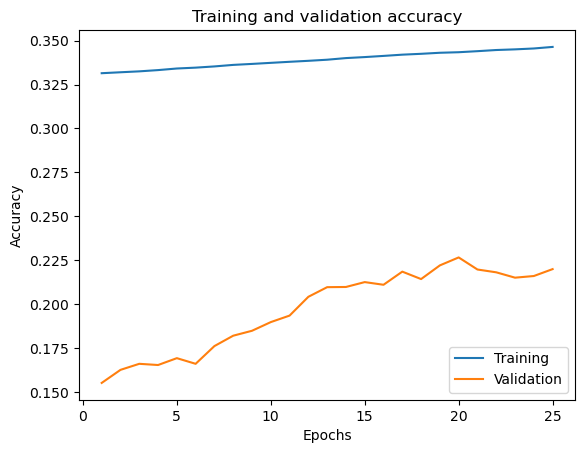

In [34]:
from utils.plot_utils import smooth_curve, plot_epochs

smooth_accuracy = smooth_curve(history.history['accuracy'][5:])
smooth_val_accuracy = smooth_curve(history.history['val_accuracy'][5:])

plot_epochs(x=range(1, len(smooth_accuracy) + 1),
            y={'Training': smooth_accuracy, 'Validation': smooth_val_accuracy},
            title='Training and validation accuracy',
            x_label='Epochs',
            y_label='Accuracy')

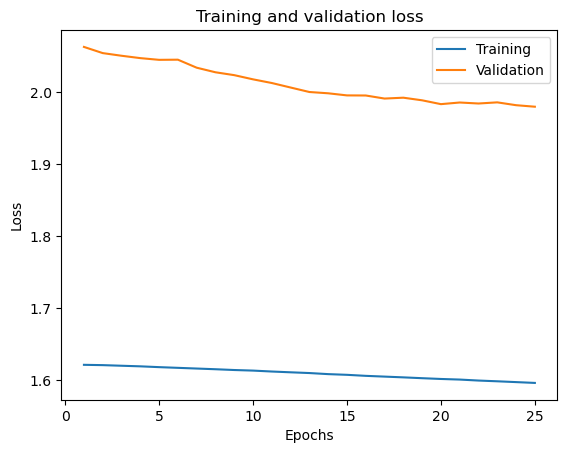

In [35]:
smooth_loss = smooth_curve(history.history['loss'][5:])
smooth_val_loss = smooth_curve(history.history['val_loss'][5:])

plot_epochs(x=range(1, len(smooth_loss) + 1),
            y={'Training': smooth_loss, 'Validation': smooth_val_loss},
            title='Training and validation loss',
            x_label='Epochs',
            y_label='Loss')

## Results

Using the model with the highest validation accuracy, I made predictions on the most recent 20% of Wade Miley’s pitches

Overall, the accuracy was quite low, at only 34%. Although this is a meaningful improvement from the baseline of 27%, it is still well below the accuracy observed in the study, which was over 60%.

In [36]:
# Print classification report
from sklearn.metrics import classification_report
y_test_argmax = np.argmax(y_test, axis=1)
preds_argmax = np.argmax(model.predict(X_test), axis=1)

print(classification_report(y_test_argmax, preds_argmax, zero_division=0))

235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

           0       0.52      0.08      0.13      2181
           1       0.00      0.00      0.00       212
           2       0.47      0.46      0.46      3026
           3       0.21      0.49      0.29      1572
           4       0.04      0.07      0.05        92
           5       0.18      0.14      0.16       424

    accuracy                           0.32      7507
   macro avg       0.24      0.21      0.18      7507
weighted avg       0.39      0.32      0.30      7507



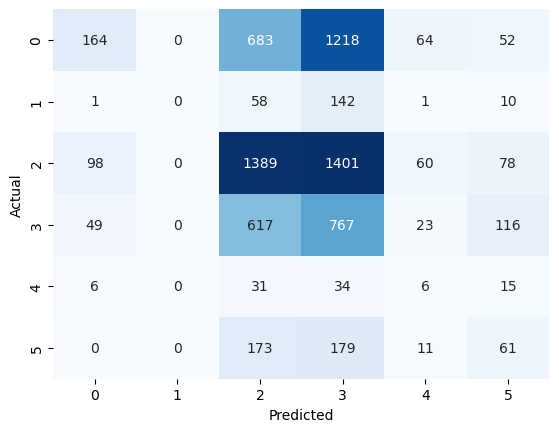

In [37]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix
cm = confusion_matrix(y_test_argmax, preds_argmax)

# Plot confusion matrix
plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Attention-based LSTMs

In [15]:
input_shape = (X_train.shape[1], X_train.shape[2])
inputs = tf.keras.layers.Input(shape=input_shape)
x = tf.keras.layers.LSTM(256, return_sequences=True)(inputs)
x = tf.keras.layers.LSTM(256, return_sequences=True)(x)
attention_output = tf.keras.layers.Attention()([x, x])
x = tf.keras.layers.Flatten()(attention_output)
x = tf.keras.layers.Dense(32, activation='relu')(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)
outputs = tf.keras.layers.Dense(repertoire_size, activation='softmax')(x)
model = tf.keras.models.Model(inputs, outputs)


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='Attention_LSTM.keras',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max'
)

history = model.fit(X_train, y_train,
                    batch_size=64,
                    epochs=30,
                    validation_data=(X_val, y_val),
                    callbacks=[checkpoint_callback],
                    verbose=0
                    )

model = tf.keras.models.load_model('Attention_LSTM.keras')
print(f"Test Accuracy: {model.evaluate(X_test, y_test)[1]}")

235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3157 - loss: 1.8660
Test Accuracy: 0.2934594452381134


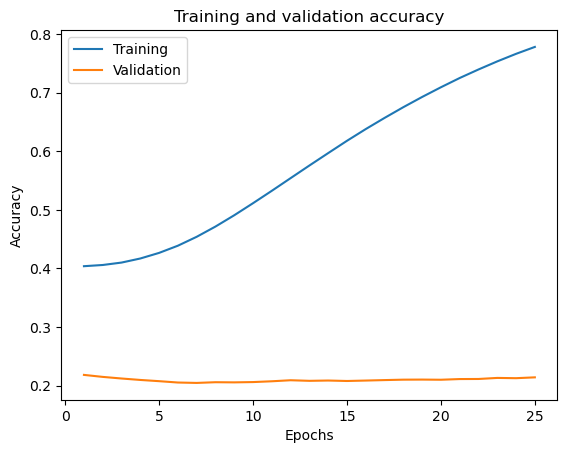

In [16]:
smooth_accuracy = smooth_curve(history.history['accuracy'][5:])
smooth_val_accuracy = smooth_curve(history.history['val_accuracy'][5:])

plot_epochs(x=range(1, len(smooth_accuracy) + 1),
            y={'Training': smooth_accuracy, 'Validation': smooth_val_accuracy},
            title='Training and validation accuracy',
            x_label='Epochs',
            y_label='Accuracy')

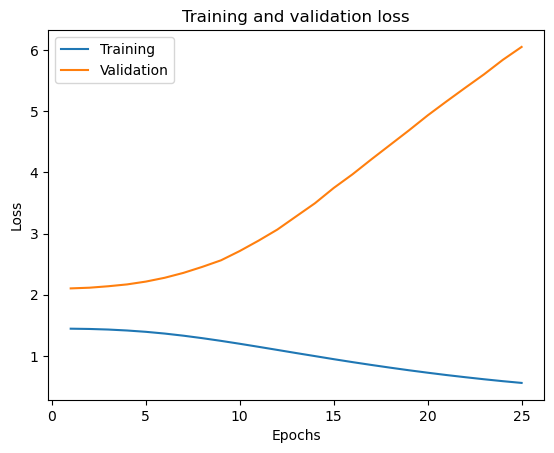

In [17]:
smooth_loss = smooth_curve(history.history['loss'][5:])
smooth_val_loss = smooth_curve(history.history['val_loss'][5:])

plot_epochs(x=range(1, len(smooth_loss) + 1),
            y={'Training': smooth_loss, 'Validation': smooth_val_loss},
            title='Training and validation loss',
            x_label='Epochs',
            y_label='Loss')

In [18]:
# Print classification report
from sklearn.metrics import classification_report
y_test_argmax = np.argmax(y_test, axis=1)
preds_argmax = np.argmax(model.predict(X_test), axis=1)

print(classification_report(y_test_argmax, preds_argmax, zero_division=0))

235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
              precision    recall  f1-score   support

           0       0.20      0.00      0.00      2181
           1       0.00      0.00      0.00       212
           2       0.47      0.41      0.44      3026
           3       0.21      0.58      0.31      1572
           4       0.10      0.14      0.11        92
           5       0.12      0.08      0.10       424

    accuracy                           0.29      7507
   macro avg       0.18      0.20      0.16      7507
weighted avg       0.30      0.29      0.25      7507



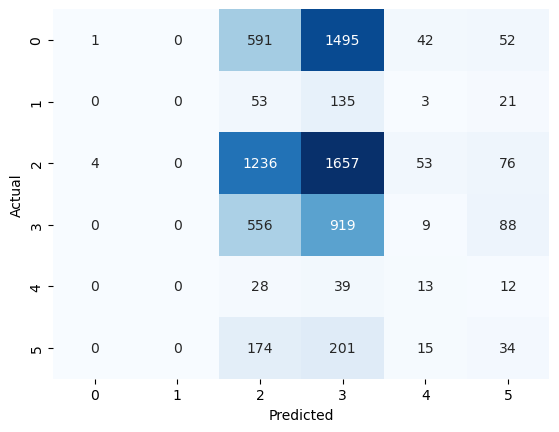

In [19]:
# Calculate confusion matrix
cm = confusion_matrix(y_test_argmax, preds_argmax)

# Plot confusion matrix
plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()